# Anomaly Detection using Autoencoder for Tennessee Eastman

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Flatten
from keras import regularizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from tensorflow.random import set_seed
from keras.regularizers import l1,l2,l1_l2

# Read data

In [17]:
# Train data without faults
train_free = pd.read_csv('../data/processed/TEP_train_free.csv')



0        0
1        1
2        2
3        3
4        4
      ... 
495    495
496    496
497    497
498    498
499    499
Name: sample, Length: 500, dtype: int64

In [4]:
# Test data with faults
test_faulty = pd.read_csv('../data/processed/TEP_test_faulty.csv') # Only 480000 rows are read to have the same length as test_free

In [5]:
# Test data without faults
test_free   = pd.read_csv('../data/processed/TEP_test_free.csv')

# Preprocessing

In [18]:
# Scale each train partition
scaler = StandardScaler()
X_train = scaler.fit_transform(train_free.drop('sample',axis=1))

In [22]:
# Scale each test partition
X_test = scaler.transform(test_faulty.drop(['sample','fault_number'],axis=1))

In [36]:
# Scale each test free partition
X_test_free = scaler.transform(test_free.drop(['sample'],axis=1))


# Define Autoencoders

## Simple Autoencoder

In [26]:

input_size = X_train.shape[1]
code_size = 4
np.random.seed(8)
set_seed(8)
x = Input(shape=(input_size,))
h = Dense(code_size, activation='tanh',kernel_regularizer=l2(0.1))(x)
r = Dense(input_size, activation='sigmoid')(h)

autoencoder1 = Model(inputs=x, outputs=r)
encoder1 = Model(x, h)
autoencoder1.compile(optimizer='adam', loss='mse')

In [27]:
autoencoder1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 52)]              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 212       
_________________________________________________________________
dense_1 (Dense)              (None, 52)                260       
Total params: 472
Trainable params: 472
Non-trainable params: 0
_________________________________________________________________


## Deep Autoencoder

In [32]:

input_size = X_train.shape[1]
code_size = 30
hidden_size = 4
np.random.seed(8)
set_seed(8)
x = Input(shape=(input_size,))
x2 = Dense(hidden_size, activation = 'tanh',kernel_regularizer=l2(0.1))(x)
h = Dense(code_size, activation='tanh',kernel_regularizer=l2(0.1))(x2)
x3 = Dense(hidden_size, activation = 'tanh',kernel_regularizer=l2(0.1))(h)
r = Dense(input_size, activation='sigmoid')(x3)

autoencoder2 = Model(inputs=x, outputs=r)
encoder2 = Model(x, h)
autoencoder2.compile(optimizer='adam', loss='mse')

In [33]:
autoencoder2.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 52)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 212       
_________________________________________________________________
dense_17 (Dense)             (None, 30)                150       
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 124       
_________________________________________________________________
dense_19 (Dense)             (None, 52)                260       
Total params: 746
Trainable params: 746
Non-trainable params: 0
_________________________________________________________________


# Train autoencoders

## Autoencoder 1

In [37]:
%%time
np.random.seed(8)
set_seed(8)
epochs = 60
batch_size = 32
np.random.seed(10)
history1 = autoencoder1.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_free, X_test_free))

Epoch 1/60
16/16 [==============================] - 2s 28ms/step - loss: 1.8584 - val_loss: 2.0137
Epoch 2/60
16/16 [==============================] - 0s 10ms/step - loss: 1.7623 - val_loss: 1.9240
Epoch 3/60
16/16 [==============================] - 0s 10ms/step - loss: 1.6783 - val_loss: 1.8461
Epoch 4/60
16/16 [==============================] - 0s 10ms/step - loss: 1.6055 - val_loss: 1.7786
Epoch 5/60
16/16 [==============================] - 0s 10ms/step - loss: 1.5425 - val_loss: 1.7201
Epoch 6/60
16/16 [==============================] - 0s 10ms/step - loss: 1.4880 - val_loss: 1.6694
Epoch 7/60
16/16 [==============================] - 0s 10ms/step - loss: 1.4409 - val_loss: 1.6253
Epoch 8/60
16/16 [==============================] - 0s 10ms/step - loss: 1.3999 - val_loss: 1.5870
Epoch 9/60
16/16 [==============================] - 0s 10ms/step - loss: 1.3643 - val_loss: 1.5534
Epoch 10/60
16/16 [==============================] - 0s 11ms/step - loss: 1.3332 - val_loss: 1.5238
Epoch 11/

## Autoencoder 2

In [38]:
%%time
np.random.seed(8)
set_seed(8)
epochs = 60
batch_size = 32
np.random.seed(10)
history2 = autoencoder2.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test_free, X_test_free))

Epoch 1/60
16/16 - 1s - loss: 3.2317 - val_loss: 3.3025
Epoch 2/60
16/16 - 0s - loss: 2.9831 - val_loss: 3.0684
Epoch 3/60
16/16 - 0s - loss: 2.7608 - val_loss: 2.8599
Epoch 4/60
16/16 - 0s - loss: 2.5626 - val_loss: 2.6740
Epoch 5/60
16/16 - 0s - loss: 2.3854 - val_loss: 2.5075
Epoch 6/60
16/16 - 0s - loss: 2.2264 - val_loss: 2.3581
Epoch 7/60
16/16 - 0s - loss: 2.0837 - val_loss: 2.2238
Epoch 8/60
16/16 - 0s - loss: 1.9557 - val_loss: 2.1039
Epoch 9/60
16/16 - 0s - loss: 1.8414 - val_loss: 1.9970
Epoch 10/60
16/16 - 0s - loss: 1.7396 - val_loss: 1.9024
Epoch 11/60
16/16 - 0s - loss: 1.6496 - val_loss: 1.8190
Epoch 12/60
16/16 - 0s - loss: 1.5705 - val_loss: 1.7455
Epoch 13/60
16/16 - 0s - loss: 1.5007 - val_loss: 1.6813
Epoch 14/60
16/16 - 0s - loss: 1.4397 - val_loss: 1.6251
Epoch 15/60
16/16 - 0s - loss: 1.3864 - val_loss: 1.5760
Epoch 16/60
16/16 - 0s - loss: 1.3397 - val_loss: 1.5332
Epoch 17/60
16/16 - 0s - loss: 1.2989 - val_loss: 1.4959
Epoch 18/60
16/16 - 0s - loss: 1.2635 - 

# Select threshold

In [39]:
def pred_and_mae(autoencoder,x):
    """
    Get predictions from autoencoder using x as input and calculate MAE for each prediction
    Input:
        autoencoder: obj Keras model for autoencoder
        x: input data for autoencoder
    Output:
        x_pred: numpy array  predicted values for x
        mae: numpy array mean absolute error for each prediction
    """
    x_pred = autoencoder.predict(x)
    mae = np.mean(np.abs(x_pred - x), axis=1)
    return x_pred, mae

In [40]:
# Lists of autoencoders, train and test sets
autoencoders = [autoencoder1,autoencoder2]


In [42]:
# Make predictions and calculate mae for the train, test and test free sets
x_train_pred = {}
x_test_pred ={}
x_test_free_pred = {}
train_mae = {}
test_mae = {}
test_free_mae = {}
for i in range(2):
    x_train_pred[i+1], train_mae[i+1] =pred_and_mae(autoencoders[i],X_train)
    x_test_pred[i+1], test_mae[i+1] = pred_and_mae(autoencoders[i],X_test_free)
    x_test_free_pred[i+1], test_free_mae[i+1] = pred_and_mae(autoencoders[i],X_test_free)


## Save MAE

In [45]:
train_mae_df = pd.DataFrame(train_mae[1])
train_mae_df.to_csv('../outputs/train_mae_AE1.csv')

In [46]:
test_mae_df = pd.DataFrame(test_mae[1])
test_mae_df.to_csv('../outputs/test_mae_AE1.csv')

In [47]:
test_free_mae_df = pd.DataFrame(test_free_mae[1])
test_free_mae_df.to_csv("../outputs/test_free_mae_AE1.csv")

In [48]:
train_mae_df = pd.DataFrame(train_mae[2])
train_mae_df.to_csv('../outputs/train_mae_AE2.csv')

In [49]:
test_mae_df = pd.DataFrame(test_mae[2])
test_mae_df.to_csv('../outputs/test_mae_AE2.csv')b

In [50]:
test_free_mae_df = pd.DataFrame(test_free_mae[2])
test_free_mae_df.to_csv("../outputs/test_free_mae_AE2.csv")

# Apply threshold

Use 99% MAE as threshold for each autoencoder

In [52]:
index = np.arange(len(test_mae[1]))
normal = index[(index%960)<160]
mask_normal = np.zeros(len(test_mae[1]), dtype=bool)
mask_normal[normal] = 1

In [51]:
thresholds = [np.quantile(train_mae[i],.99) for i in range(1,3) ]

In [53]:
anom_test_99 = np.zeros_like(test_mae[1],dtype=bool)
anom_test_free_99 = np.zeros_like(test_free_mae[1],dtype=bool)
for i in range(1,3):
    anom_test_99 = anom_test_99 | (test_mae[i] > thresholds[i-1])
    anom_test_free_99 = anom_test_free_99 | (test_free_mae[i]>thresholds[i-1])


In [60]:
TPR_99 = (anom_test_99 & ~mask_normal).sum()/(~mask_normal).sum()

In [61]:
FPR_99 = (anom_test_free_99.sum() + (anom_test_99 & mask_normal).sum() )/(len(anom_test_free_99) + mask_normal.sum())


In [62]:
#True positive rate when threshold = 99%
print(f'TPR:{TPR_99*100:.2f}%') #%

TPR:9.75%


In [63]:
print(f'FPR:{round(FPR_99*100,2)}%')

FPR:7.14%


# Visualizations

In [58]:
percentage_right_per_fault1 = test_faulty[['fault_number','sample']][(anom_test_99[:960*21]==1) & (test_faulty['sample']>160) ].groupby('fault_number').count()*100/800

ValueError: operands could not be broadcast together with shapes (960,) (20160,) 

In [41]:
round(percentage_right_per_fault1,2)

,sample
fault_number,
1,99.62
2,98.38
3,17.38
4,64.12
5,37.62
6,99.88
7,99.88
8,98.38
9,17.38


In [59]:
percentage_right_per_fault1.plot(kind='bar',figsize=(15,8),ylim=(0,100))

NameError: name 'percentage_right_per_fault1' is not defined

In [46]:
test_mae_mask = {}
for i in range(1,5):
    test_mae_mask[i] =  np.ma.array(test_mae[i],mask=~anom_test_99)

In [47]:
test_free_mae_mask = {}
for i in range(1,5):
    test_free_mae_mask[i] =  np.ma.array(test_free_mae[i],mask=~anom_test_free_99)

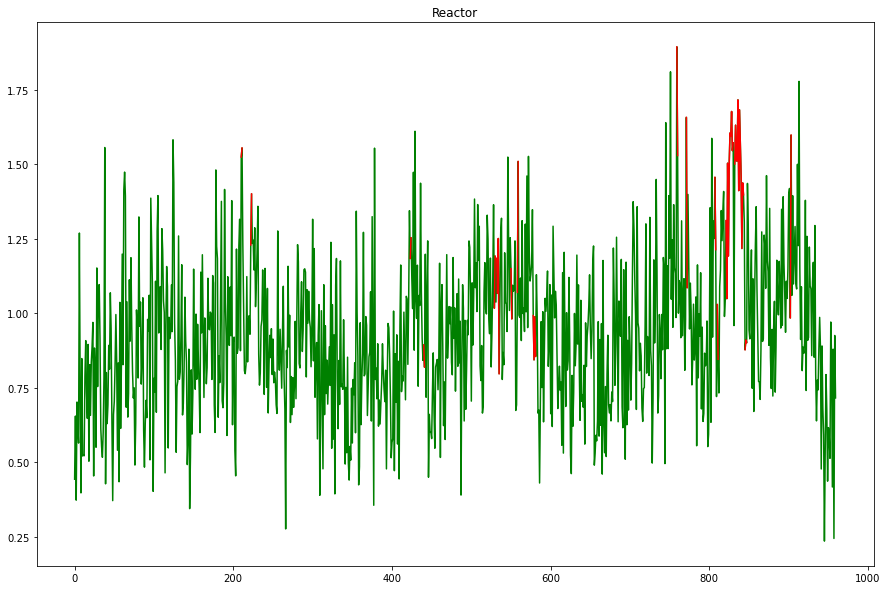

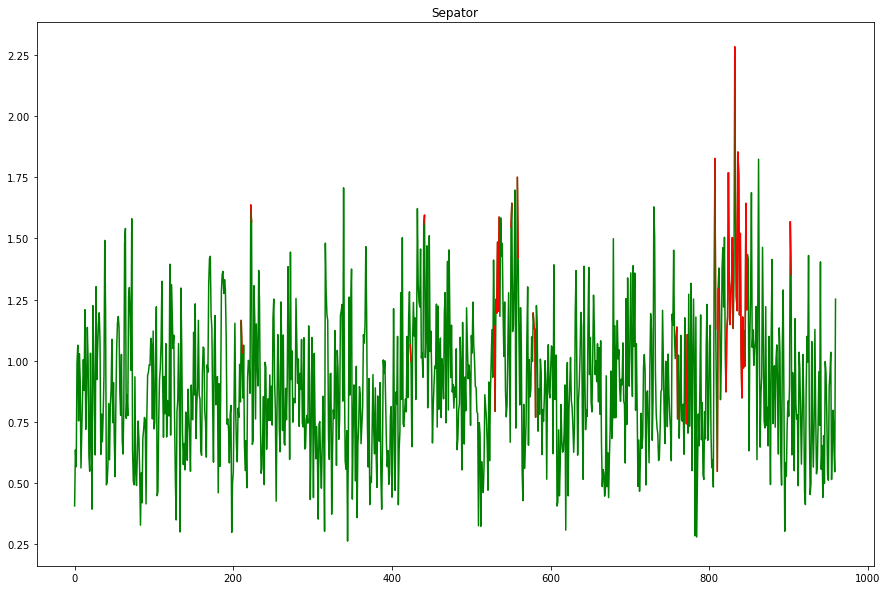

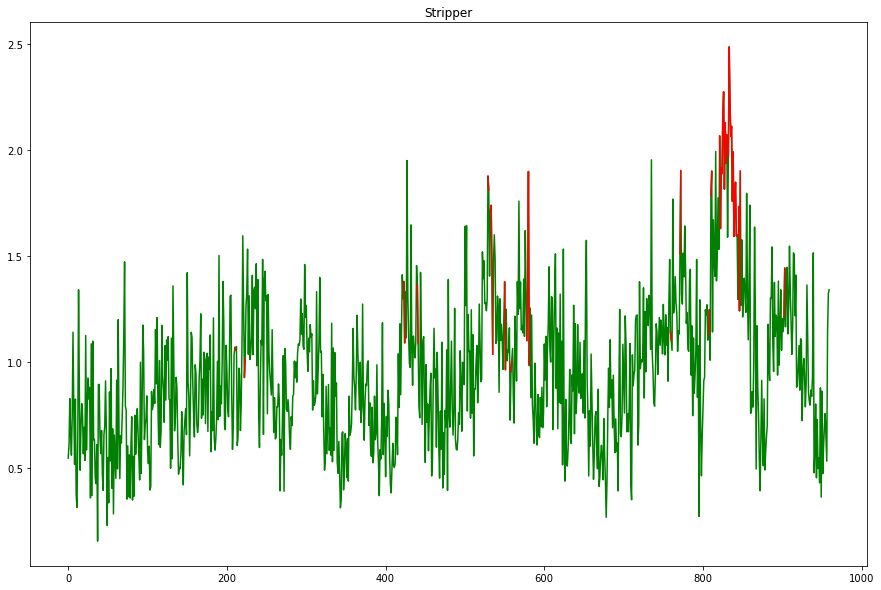

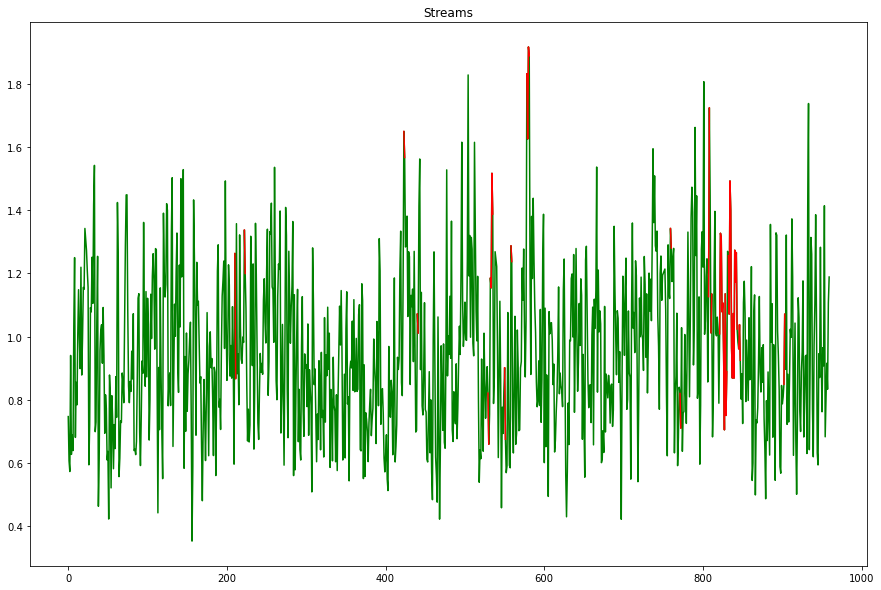

In [45]:
titles = ['Reactor','Sepator','Stripper','Streams']
for i in range(1,5):
    plt.figure(figsize=(15,10))
    plt.plot(test_free_mae[i][:960*21],'g')
    plt.plot(test_free_mae_mask[i][:960*21],'r')
    plt.title(titles[i-1])
    #for j in range(1,21):
     #   plt.axvline(960*j,color='k')
      #  plt.text(x=960*j-480,y=18,s=j)
    plt.show()

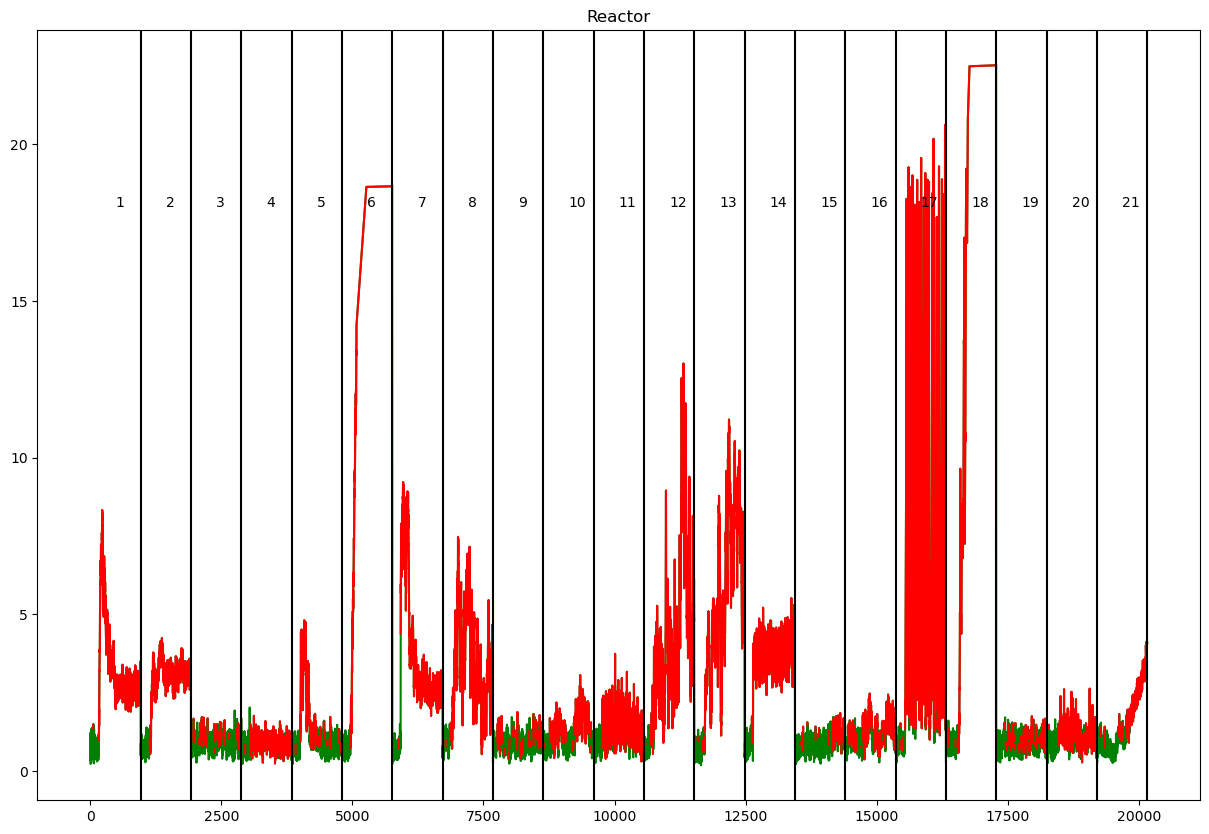

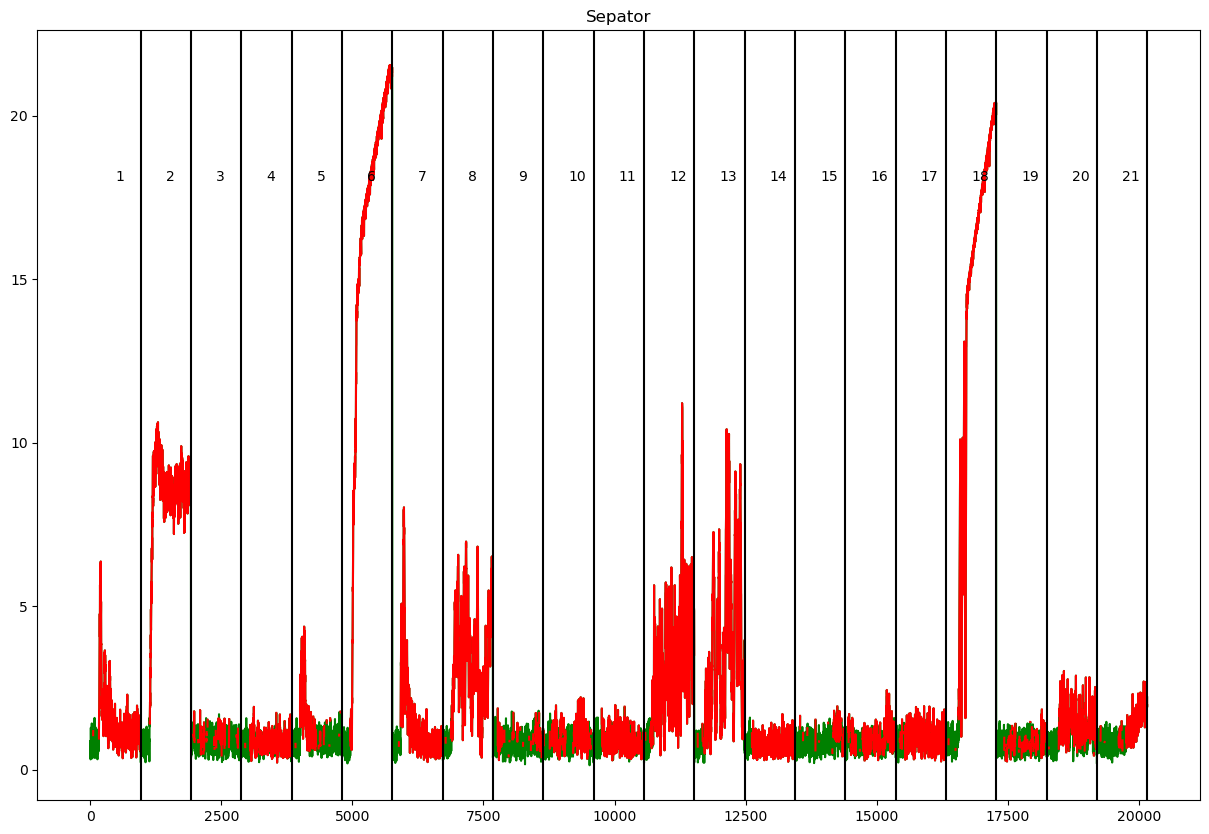

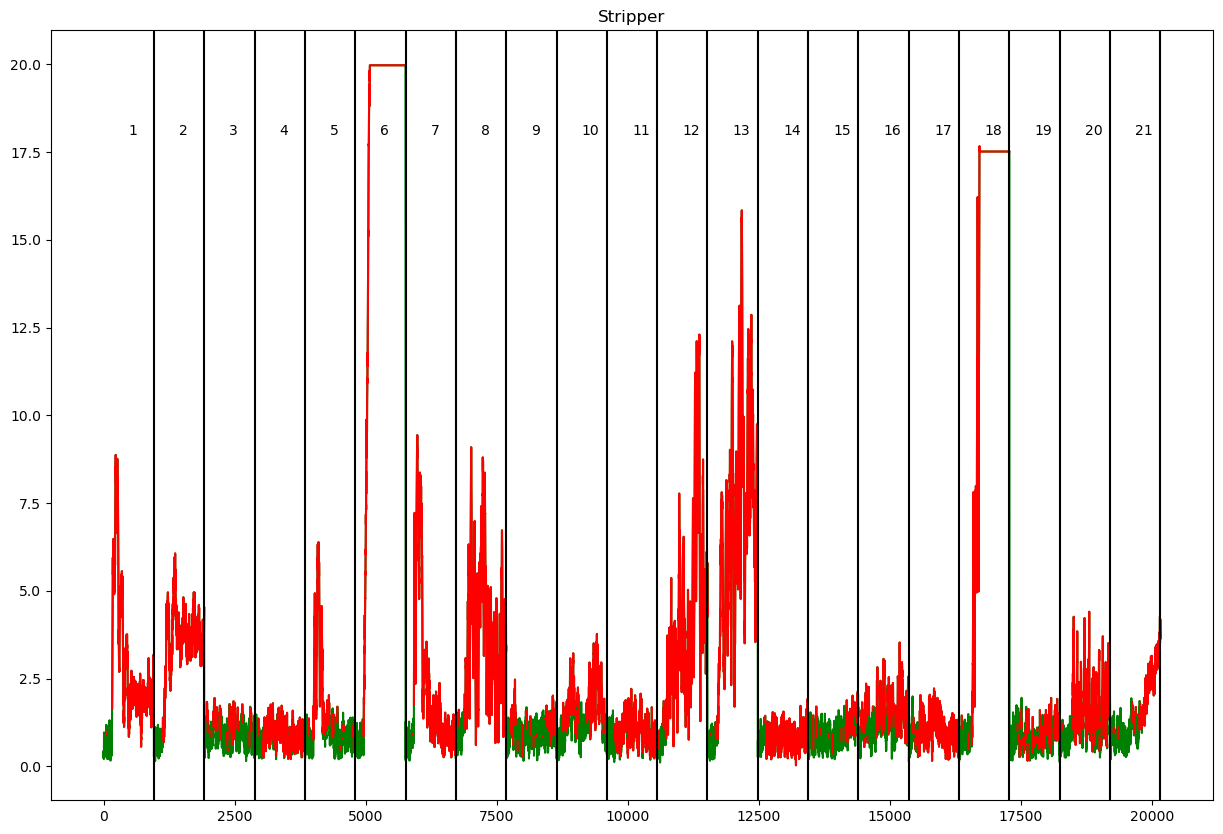

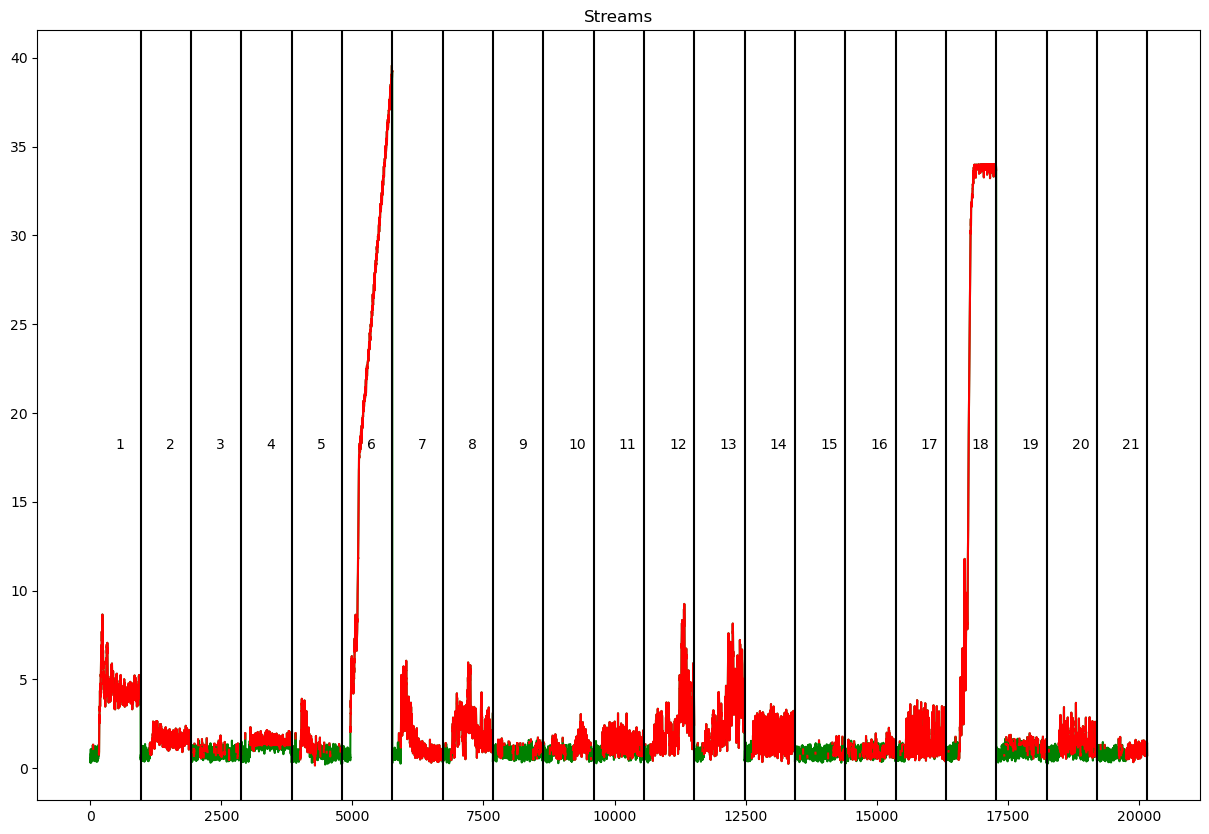

In [48]:
titles = ['Reactor','Sepator','Stripper','Streams']
for i in range(1,5):
    plt.figure(figsize=(15,10))
    plt.plot(test_mae[i][:960*21],'g')
    plt.plot(test_mae_mask[i][:960*21],'r')
    plt.title(titles[i-1])
    for j in range(1,22):
        plt.axvline(960*j,color='k')
        plt.text(x=960*j-480,y=18,s=j)
    plt.show()

# ROI Curves

In [53]:
def ROI_curve(train_mae,test_mae,test_free_mae,plot=True):
    
    # Create mask for normal points in the test faulty set
    index = np.arange(len(test_mae[1]))
    normal = index[(index%960)<160]
    mask_normal = np.zeros(len(test_mae[1]), dtype=bool)
    mask_normal[normal] = 1
    # Select quantiles for the creation of thresholds
    quantiles = np.concatenate((np.arange(0,0.1,0.001),np.arange(0.1,0.9,0.01),np.arange(0.9,1.001,0.001)))
    #thresholds = np.quantile(train_mae_loss,quantiles)
    
    # Create thresholds for each autoencoder
    thresholds = np.array([np.quantile(train_mae[i],quantiles) for i in range(1,5) ])
    
    #Create arrays for TPR and FPR
    true_positive_rate  = np.empty_like(thresholds[0])
    false_positive_rate = np.empty_like(thresholds[0])
    # Calculate totals
    total_positive = test_mae[1].shape[0]  - mask_normal.sum() # do not count normal points 
    total_negative = test_free_mae[1].shape[0] + mask_normal.shape[0] # add normal points in test faulty
    # Initialize anomaly arrays
    anom_test = []
    anom_test_free = []
    # Calculate anomalies

    for k in range(thresholds.shape[1]):
        anom_test.append(np.zeros_like(test_mae[1],dtype=bool))
        anom_test_free.append(np.zeros_like(test_free_mae[1],dtype=bool))
        for i in range(4):
            anom_test[k] = anom_test[k] | (test_mae[i+1] > thresholds[i,k])
            anom_test_free[k] = anom_test_free[k] | (test_free_mae[i+1]>thresholds[i,k])
        true_positive_count = (anom_test[k]*~mask_normal ).sum()
        false_positive_count = anom_test_free[k].sum() + (anom_test[k]*mask_normal).sum()
        true_positive_rate[k] = true_positive_count/total_positive
        false_positive_rate[k] = false_positive_count/total_negative
    false_positive_rate= np.insert(false_positive_rate,0,1)
    true_positive_rate = np.insert(true_positive_rate,0,1)
    if plot:
        plt.figure()
        plt.title("ROC Curve")
        plt.plot(false_positive_rate, true_positive_rate,'-')
        plt.plot([0,1],[0,1],'-')
        plt.ylabel("TPR")
        plt.xlabel("FPR")
        plt.xlim((0,1.01))
        plt.ylim((0,1.01))
        plt.show()
    return((false_positive_rate,true_positive_rate))

In [54]:
test_mae_f = {}
for k in range(1,22):
    test_mae_f[k] = {}
    for i in range(1,5):
        test_mae_f[k][i] = test_mae[i][(0+960*(k-1)):(960*k)]

In [55]:
from sklearn.metrics import auc

In [56]:
FPRs = {}
TPRs = {}
AUCs = {}
for k in range(1,22):
    FPRs[k],TPRs[k] = ROI_curve(train_mae,test_mae_f[k],test_free_mae,plot=False)
    FPRs[k] = np.append(np.insert(FPRs[k],0,1),0)
    TPRs[k] = np.append(np.insert(TPRs[k],0,1),0)
    AUCs[k] = auc(FPRs[k],TPRs[k])

In [57]:
for i in range(1,21):
    _df = pd.DataFrame({'FPR':FPRs[i],'TPR':TPRs[i]})
    _df.to_csv(f"../outputs/ROC/Autoencoder_ROC_Tns_F{i}.csv",index=False)

In [213]:
#np.savetxt('ROC_curve_F1.csv',s,delimiter=',',header='FPR,TPR')

In [58]:
for failure in range(1,22):
    print(f"AUC for failure {failure} is: {AUCs[failure]:.04f}")

AUC for failure 1 is: 0.9898
AUC for failure 2 is: 0.9851
AUC for failure 3 is: 0.7633
AUC for failure 4 is: 0.9429
AUC for failure 5 is: 0.8169
AUC for failure 6 is: 0.9904
AUC for failure 7 is: 0.9896
AUC for failure 8 is: 0.9880
AUC for failure 9 is: 0.7458
AUC for failure 10 is: 0.8908
AUC for failure 11 is: 0.9199
AUC for failure 12 is: 0.9876
AUC for failure 13 is: 0.9799
AUC for failure 14 is: 0.9893
AUC for failure 15 is: 0.7538
AUC for failure 16 is: 0.8792
AUC for failure 17 is: 0.9750
AUC for failure 18 is: 0.9660
AUC for failure 19 is: 0.8027
AUC for failure 20 is: 0.8997
AUC for failure 21 is: 0.8452


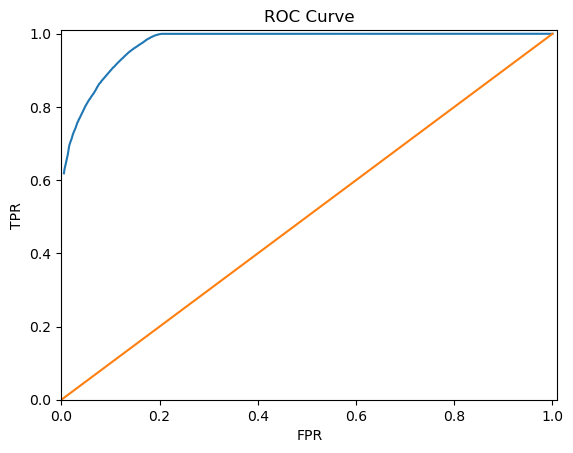

In [60]:
fpr,tpr = ROI_curve(train_mae,test_mae,test_free_mae)

In [61]:
roc_df = pd.DataFrame({"FPR":fpr,"TPR":tpr})


# Save ROC curve

In [62]:
roc_df.to_csv("../outputs/ROC/ROC_4AE.csv")

# AUC

In [63]:
from sklearn.metrics import auc

AUC1 = auc(fpr,tpr)
print(f"AUC1:{AUC1:.04f}")

AUC1:0.9714


# Save Anomalies

In [64]:
np.savetxt("../outputs/Anomaly_4AE.csv",~anom_test_99,delimiter=",")